In [1]:
# IMPLEMENTING SELF ORGANIZING MAPS FOR FRAUD DETECTION

In [2]:
# IMPORT THE LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c:\users\ashv6\pycharmprojects\dl\venv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\ashv6\pycharmprojects\dl\venv\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
c:\users\ashv6\pycharmprojects\dl\venv\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
# IMPORT THE DATASET
dataset = pd.read_csv("Credit_Card_Applications.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
# print(X, y)

In [5]:
# FEATURE SCALING - USE NORMALIZATION

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# print(X)

In [6]:
# IMPLEMENT THE SELF ORGANIZING MAP USING MINISOM

from minisom import MiniSom
SOM = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)

# Initialise the weights
SOM.random_weights_init(X)

# Train the SOM
SOM.train_random(data = X, num_iteration = 100)

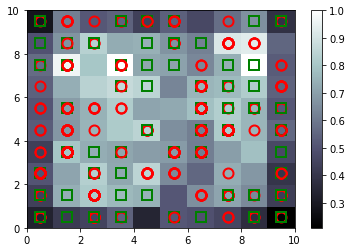

In [7]:
# VISUALIZING THE RESULTS -> WILL CONTAIN THE WINNING NODE WITH THE MEAN INTERNEURON DISTANCES
from pylab import bone, pcolor, colorbar, plot, show

# Initialise the Window
bone()

# To get MIDs, use the distance_map method and transpose the matrix
pcolor(SOM.distance_map().T)

# Add Legend - High MID corresponds to white color
colorbar()

markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = SOM.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)

show()

In [12]:
# FINDING THE FRAUDS

mappings = SOM.win_map(X)
frauds = np.concatenate((mappings[(3, 7)], mappings[(8, 7)], mappings[(1, 7)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [13]:
# PRINTING THE FRAUD CLIENTS

print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15608595
15761158
15666166
15605872
15665087
15789201
15751137
15800049
15801817
15796787
15768449
15648069
15731586
15575605
15644453
15694666
15646594
15699238
15593959
15629750
15592999
15577771
15599272
15721504
15611682
